In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
# Load the Wine dataset
wine = load_wine()
X = wine.data  # Input features
y = wine.target  # Target labels
num_features = X.shape[1]  # Number of input features
num_classes = len(set(y))  # Number of output classes

In [12]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# One-hot encoding for labels
y_train_one_hot = to_categorical(y_train, num_classes)  # Convert training labels to one-hot encoded format
y_test_one_hot = to_categorical(y_test, num_classes)  # Convert test labels to one-hot encoded format

In [15]:
# Define the model
model = Sequential([
    Dense(64, input_shape=(num_features,), activation='relu'),  # First hidden layer with 64 neurons and ReLU activation
    Dropout(0.2),  # Dropout layer to prevent overfitting (20% of neurons dropped)
    Dense(32, activation='relu'),  # Second hidden layer with 32 neurons and ReLU activation
    Dropout(0.2),  # Dropout layer to prevent overfitting (20% of neurons dropped)
    Dense(16, activation='relu'),  # Third hidden layer with 16 neurons and ReLU activation
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the model
model.compile(optimizer='adam',  # Use the Adam optimizer for efficient training
              loss='categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Track accuracy during training

In [17]:
# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=20, batch_size=32, validation_split=0.2)  # Train the model with 20 epochs, batch size 32, and 20% validation split

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.3203 - loss: 1.1953 - val_accuracy: 0.4828 - val_loss: 1.0566
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4762 - loss: 1.0739 - val_accuracy: 0.5172 - val_loss: 0.9841
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4793 - loss: 1.0523 - val_accuracy: 0.5862 - val_loss: 0.9256
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5745 - loss: 0.9973 - val_accuracy: 0.6552 - val_loss: 0.8764
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6124 - loss: 0.9310 - val_accuracy: 0.6897 - val_loss: 0.8253
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6503 - loss: 0.8942 - val_accuracy: 0.7241 - val_loss: 0.7726
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6521 - loss: 0.8437 - val_accuracy: 0.7586 - val_loss: 0.7175
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7684 - loss: 0.7502 - val_accuracy: 0.8276 - val_loss: 0.6617


In [18]:
# Evaluate the model
evaluation = model.evaluate(X_test, y_test_one_hot, verbose=0)  # Evaluate the model on the test dataset
print(f"Loss: {evaluation[0]:.4f}, Accuracy: {evaluation[1]:.4f}")  # Print the loss and accuracy of the model

Loss: 0.1937, Accuracy: 1.0000


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


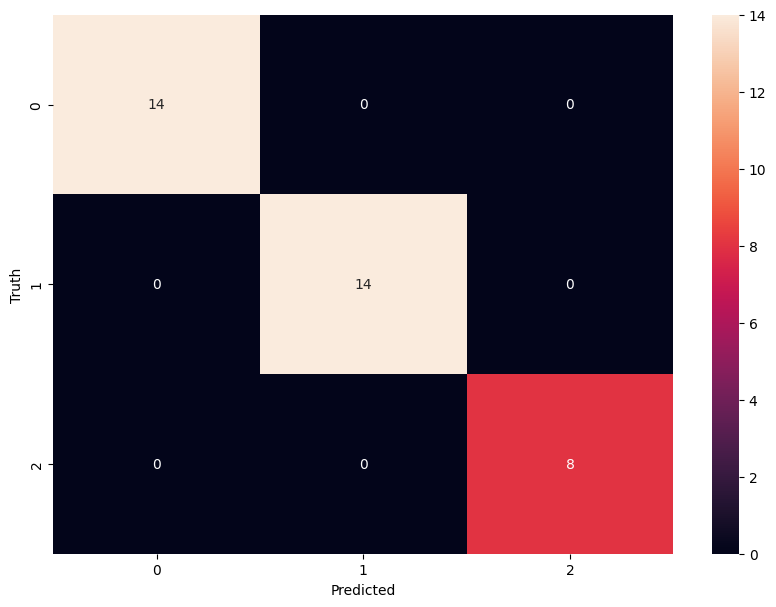

In [19]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()